In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

%matplotlib inline

base_img_path = "../../report/assets/images/case-study-01/"

In [2]:
threads = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

def read_data(test_name: str) -> pd.DataFrame:
    results_files = [f"../jmeter/results-{test_name}-1000-{i}-1.jtl" for i in threads]
    li = []
    for i, filename in enumerate(results_files):
        df_new = pd.read_csv(filename, index_col=None, header=0)
        df_new["Threads"] = threads[i]
        li.append(df_new)

    return pd.concat(li, axis=0, ignore_index=True)

### Load Test A: GET /api/movie/list

In [3]:
dfa = read_data("a")
dfa

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,1650640554700,74,GET Request,200,OK,Thread Group (Users) 1-1,text,True,NaN,1151,133,2,2,http://localhost:8099/api/movie/list,69,0,21,10
1,1650640554700,74,GET Request,200,OK,Thread Group (Users) 1-2,text,True,NaN,1151,133,2,2,http://localhost:8099/api/movie/list,69,0,21,10
2,1650640554776,13,GET Request,200,OK,Thread Group (Users) 1-1,text,True,NaN,1151,133,2,2,http://localhost:8099/api/movie/list,13,0,0,10
3,1650640554777,12,GET Request,200,OK,Thread Group (Users) 1-2,text,True,NaN,1151,133,2,2,http://localhost:8099/api/movie/list,12,0,0,10
4,1650640554789,12,GET Request,200,OK,Thread Group (Users) 1-1,text,True,NaN,1151,133,3,3,http://localhost:8099/api/movie/list,12,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,1650641313028,11,GET Request,200,OK,Thread Group (Users) 1-77,text,True,NaN,1151,133,1,1,http://localhost:8099/api/movie/list,10,0,0,100
549996,1650641313039,11,GET Request,200,OK,Thread Group (Users) 1-77,text,True,NaN,1151,133,1,1,http://localhost:8099/api/movie/list,11,0,0,100
549997,1650641313050,11,GET Request,200,OK,Thread Group (Users) 1-77,text,True,NaN,1151,133,1,1,http://localhost:8099/api/movie/list,11,0,0,100
549998,1650641313062,12,GET Request,200,OK,Thread Group (Users) 1-77,text,True,NaN,1151,133,1,1,http://localhost:8099/api/movie/list,12,0,0,100


In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timeStamp        550000 non-null  int64  
 1   elapsed          550000 non-null  int64  
 2   label            550000 non-null  object 
 3   responseCode     550000 non-null  int64  
 4   responseMessage  550000 non-null  object 
 5   threadName       550000 non-null  object 
 6   dataType         550000 non-null  object 
 7   success          550000 non-null  bool   
 8   failureMessage   0 non-null       float64
 9   bytes            550000 non-null  int64  
 10  sentBytes        550000 non-null  int64  
 11  grpThreads       550000 non-null  int64  
 12  allThreads       550000 non-null  int64  
 13  URL              550000 non-null  object 
 14  Latency          550000 non-null  int64  
 15  IdleTime         550000 non-null  int64  
 16  Connect          550000 non-null  int6

In [5]:
dfa = dfa.sort_values(by="timeStamp")
dfa["timeStamp"] = dfa["timeStamp"].diff().cumsum() / 1e3
dfa

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
360018,NaN,78,GET Request,200,OK,Thread Group (Users) 1-11,text,True,NaN,1151,133,26,26,http://localhost:8099/api/movie/list,72,0,44,90
360000,0.000,78,GET Request,200,OK,Thread Group (Users) 1-8,text,True,NaN,1151,133,26,26,http://localhost:8099/api/movie/list,72,0,44,90
360022,0.000,78,GET Request,200,OK,Thread Group (Users) 1-13,text,True,NaN,1151,133,26,26,http://localhost:8099/api/movie/list,73,0,44,90
360021,0.000,78,GET Request,200,OK,Thread Group (Users) 1-15,text,True,NaN,1157,133,26,26,http://localhost:8099/api/movie/list,72,0,44,90
360020,0.000,78,GET Request,200,OK,Thread Group (Users) 1-3,text,True,NaN,1151,133,26,26,http://localhost:8099/api/movie/list,72,0,44,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,921.808,11,GET Request,200,OK,Thread Group (Users) 1-77,text,True,NaN,1151,133,1,1,http://localhost:8099/api/movie/list,10,0,0,100
549996,921.819,11,GET Request,200,OK,Thread Group (Users) 1-77,text,True,NaN,1151,133,1,1,http://localhost:8099/api/movie/list,11,0,0,100
549997,921.830,11,GET Request,200,OK,Thread Group (Users) 1-77,text,True,NaN,1151,133,1,1,http://localhost:8099/api/movie/list,11,0,0,100
549998,921.842,12,GET Request,200,OK,Thread Group (Users) 1-77,text,True,NaN,1151,133,1,1,http://localhost:8099/api/movie/list,12,0,0,100


In [6]:
dfa_by_threads = dfa.groupby("Threads").mean()
dfa_by_threads

,timeStamp,elapsed,responseCode,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
Threads,,,,,,,,,,,,
10,167.369785,6.758100,200.00000,1.000000,NaN,1151.954000,133.0,9.740000,9.740000,6.719300,0.0,0.004700
20,212.348694,9.313250,200.00000,1.000000,NaN,1151.973800,133.0,19.364100,19.364100,9.279400,0.0,0.004450
30,230.485571,16.587133,271.10000,0.763000,NaN,940.652800,133.0,28.823567,28.823567,16.546067,0.0,0.005133
40,257.412959,20.456675,252.50000,0.825000,NaN,995.858700,133.0,38.220325,38.220325,20.410100,0.0,0.005300
50,293.023530,24.920480,247.38800,0.842040,NaN,1010.993520,133.0,48.449900,48.449900,24.866660,0.0,0.006640
60,341.474848,23.618683,223.26000,0.922467,NaN,1082.592133,133.0,57.941033,57.941050,23.559733,0.0,0.006450
70,402.134168,35.868671,219.59000,0.934700,NaN,1093.459171,133.0,67.961757,67.961771,35.797014,0.0,0.008329
80,467.915155,36.841138,232.36625,0.892112,NaN,1055.563700,133.0,77.932362,77.932362,36.772600,0.0,0.006987
90,19.225051,46.345189,243.79000,0.854033,NaN,1021.635133,133.0,87.213433,87.213444,46.273911,0.0,0.010856


In [7]:
pd.set_option('display.float_format', '{:.0%}'.format)
dfa.groupby("Threads")["responseCode"].value_counts(normalize=True)

Threads  responseCode
10       200            100%
20       200            100%
30       200             76%
         500             24%
40       200             82%
         500             18%
50       200             84%
         500             16%
60       200             92%
         500              8%
70       200             93%
         500              7%
80       200             89%
         500             11%
90       200             85%
         500             15%
100      200             79%
         500             21%
Name: responseCode, dtype: float64

In [8]:
pd.reset_option('display.float_format')

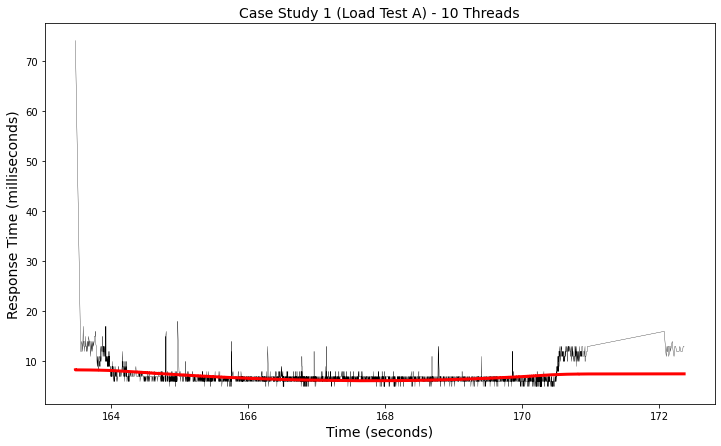

In [9]:
plt.figure(figsize=(12, 7), facecolor="white")
t = 10
x = dfa[dfa["Threads"] == t]["timeStamp"]
y = dfa[dfa["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.3)
plt.plot(x, savgol_filter(y, 10000, 2), color="red", lw=3)
plt.title(f"Case Study 1 (Load Test A) - {t} Threads", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Response Time (milliseconds)", fontsize=14)
plt.savefig(f"{base_img_path}cs01-lta-1.png", bbox_inches="tight", dpi=120)
plt.show()

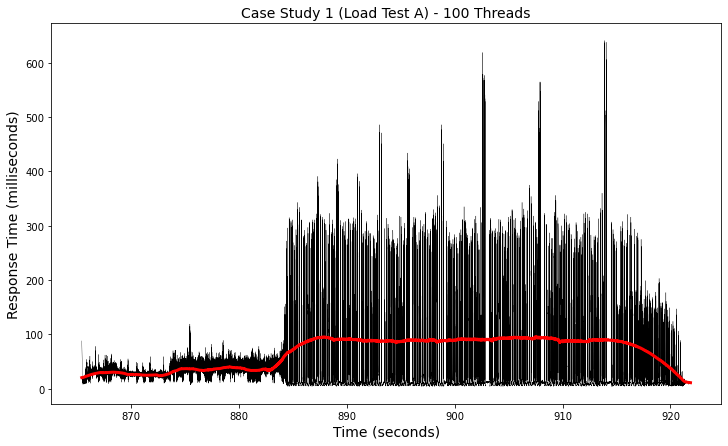

In [10]:
plt.figure(figsize=(12, 7), facecolor="white")
t = 100
x = dfa[dfa["Threads"] == t]["timeStamp"]
y = dfa[dfa["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.3)
plt.plot(x, savgol_filter(y, 10000, 2), color="red", lw=3)
plt.title(f"Case Study 1 (Load Test A) - {t} Threads", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Response Time (milliseconds)", fontsize=14)
plt.savefig(f"{base_img_path}cs01-lta-2.png", bbox_inches="tight", dpi=120)
plt.show()

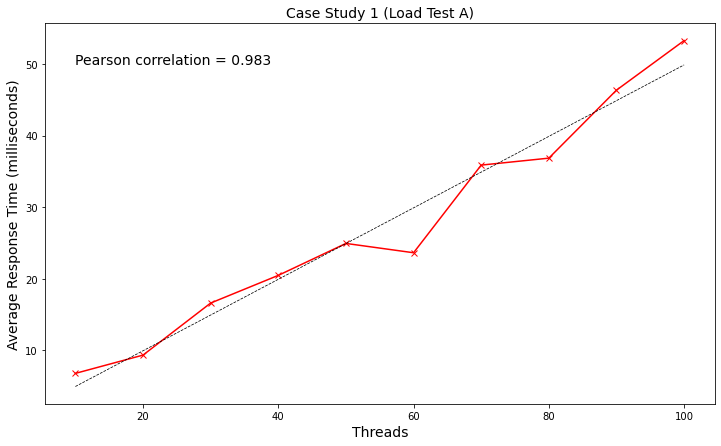

In [11]:
plt.figure(figsize=(12, 7), facecolor="white")
x = dfa_by_threads.index
y = dfa_by_threads["elapsed"]
plt.plot(x, y, color="red", marker="x")
plt.title("Case Study 1 (Load Test A)", fontsize=14)
plt.xlabel("Threads", fontsize=14)
plt.ylabel("Average Response Time (milliseconds)", fontsize=14)

# trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="black", ls="--", lw=0.75)
plt.text(10, 50, f"Pearson correlation = {round(np.corrcoef(x, y)[0][1], 3)}", fontsize=14)
plt.savefig(f"{base_img_path}cs01-lta-4.png", bbox_inches="tight", dpi=120)

plt.show()

### Load Test B: POST /cinema/cineworld/reservation/make

In [12]:
dfb = read_data("b")
dfb.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,1650642528242,63,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,59,0,26,10
1,1650642528242,63,POST Request,201,Created,Thread Group (Users) 1-1,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,59,0,26,10
2,1650642528308,7,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,7,0,0,10
3,1650642528308,7,POST Request,201,Created,Thread Group (Users) 1-1,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,7,0,0,10
4,1650642528315,5,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,5,0,0,10


In [13]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timeStamp        550000 non-null  int64  
 1   elapsed          550000 non-null  int64  
 2   label            550000 non-null  object 
 3   responseCode     550000 non-null  int64  
 4   responseMessage  550000 non-null  object 
 5   threadName       550000 non-null  object 
 6   dataType         550000 non-null  object 
 7   success          550000 non-null  bool   
 8   failureMessage   0 non-null       float64
 9   bytes            550000 non-null  int64  
 10  sentBytes        550000 non-null  int64  
 11  grpThreads       550000 non-null  int64  
 12  allThreads       550000 non-null  int64  
 13  URL              550000 non-null  object 
 14  Latency          550000 non-null  int64  
 15  IdleTime         550000 non-null  int64  
 16  Connect          550000 non-null  int6

In [14]:
dfb = dfb.sort_values(by="timeStamp")
dfb["timeStamp"] = dfb["timeStamp"].diff().cumsum() / 1e3
dfb

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,NaN,63,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,59,0,26,10
1,0.000,63,POST Request,201,Created,Thread Group (Users) 1-1,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,59,0,26,10
2,0.066,7,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,7,0,0,10
3,0.066,7,POST Request,201,Created,Thread Group (Users) 1-1,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,7,0,0,10
4,0.073,5,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,5,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,155.096,1,POST Request,201,Created,Thread Group (Users) 1-97,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,1,0,0,100
549996,155.097,1,POST Request,201,Created,Thread Group (Users) 1-100,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,1,0,0,100
549997,155.097,1,POST Request,201,Created,Thread Group (Users) 1-97,text,True,NaN,298,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,1,0,0,100
549998,155.098,1,POST Request,201,Created,Thread Group (Users) 1-100,text,True,NaN,293,456,1,1,http://localhost:8099/cinema/cineworld/reserva...,1,0,0,100


In [15]:
dfb_by_threads = dfb.groupby("Threads").mean()
dfb_by_threads

,timeStamp,elapsed,responseCode,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
Threads,,,,,,,,,,,,
10,1.427788,1.915100,201.0,1.0,NaN,293.594300,456.0,9.095300,9.095300,1.878300,0.0,0.005800
20,10.287211,1.861200,201.0,1.0,NaN,293.565500,456.0,16.897450,16.897350,1.824050,0.0,0.004850
30,25.987026,2.219333,201.0,1.0,NaN,293.472400,456.0,26.051900,26.051900,2.182333,0.0,0.005867
40,36.612866,2.751700,201.0,1.0,NaN,293.477775,456.0,35.483250,35.483325,2.713950,0.0,0.006525
50,48.370199,3.608240,201.0,1.0,NaN,293.504220,456.0,45.501180,45.501180,3.572380,0.0,0.006400
60,61.482284,4.227183,201.0,1.0,NaN,293.510050,456.0,55.310550,55.310517,4.193000,0.0,0.006483
70,78.321011,5.211557,201.0,1.0,NaN,293.525057,456.0,65.874514,65.874514,5.175200,0.0,0.008043
80,122.867475,5.871650,201.0,1.0,NaN,293.521763,456.0,75.595425,75.595450,5.835863,0.0,0.009525
90,137.405253,6.857744,201.0,1.0,NaN,293.539844,456.0,86.549267,86.549256,6.821478,0.0,0.011511


In [16]:
pd.set_option('display.float_format', '{:.0%}'.format)
dfb.groupby("Threads")["responseCode"].value_counts(normalize=True)

Threads  responseCode
10       201            100%
20       201            100%
30       201            100%
40       201            100%
50       201            100%
60       201            100%
70       201            100%
80       201            100%
90       201            100%
100      201            100%
Name: responseCode, dtype: float64

In [17]:
pd.reset_option('display.float_format')

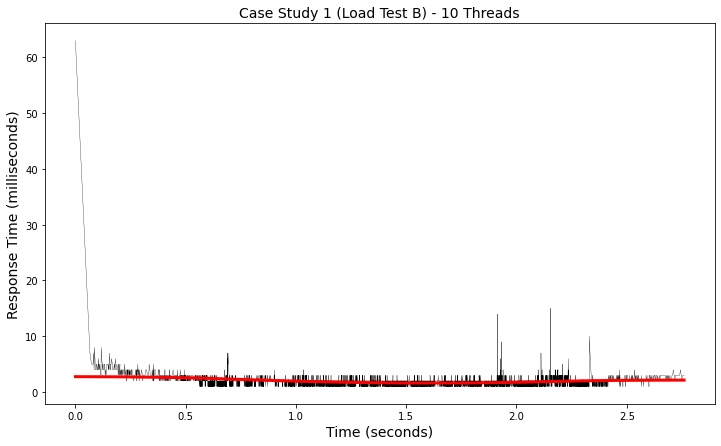

In [18]:
plt.figure(figsize=(12, 7), facecolor="white")
t = 10
x = dfb[dfb["Threads"] == t]["timeStamp"]
y = dfb[dfb["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.3)
plt.plot(x, savgol_filter(y, 10000, 2), color="red", lw=3)
plt.title(f"Case Study 1 (Load Test B) - {t} Threads", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Response Time (milliseconds)", fontsize=14)
plt.savefig(f"{base_img_path}cs01-ltb-1.png", bbox_inches="tight", dpi=120)
plt.show()

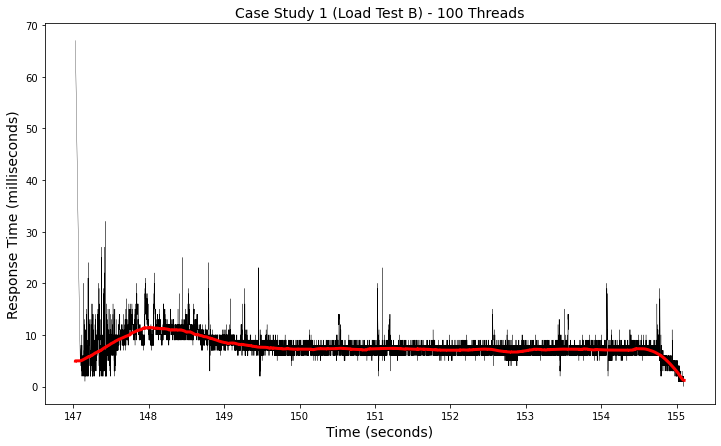

In [19]:
plt.figure(figsize=(12, 7), facecolor="white")
t = 100
x = dfb[dfb["Threads"] == t]["timeStamp"]
y = dfb[dfb["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.3)
plt.plot(x, savgol_filter(y, 10000, 2), color="red", lw=3)
plt.title(f"Case Study 1 (Load Test B) - {t} Threads", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Response Time (milliseconds)", fontsize=14)
plt.savefig(f"{base_img_path}cs01-ltb-2.png", bbox_inches="tight", dpi=120)
plt.show()

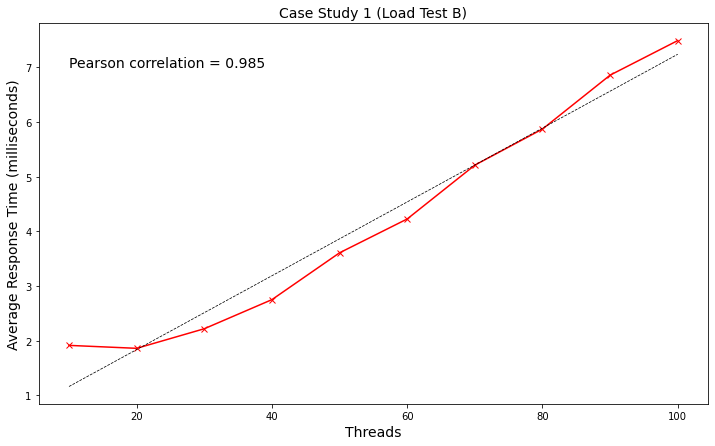

In [20]:
plt.figure(figsize=(12, 7), facecolor="white")
x = dfb_by_threads.index
y = dfb_by_threads["elapsed"]
plt.plot(x, y, color="red", marker="x")
plt.title("Case Study 1 (Load Test B)", fontsize=14)
plt.xlabel("Threads", fontsize=14)
plt.ylabel("Average Response Time (milliseconds)", fontsize=14)

# trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="black", ls="--", lw=0.75)
plt.text(10, 7, f"Pearson correlation = {round(np.corrcoef(x, y)[0][1], 3)}", fontsize=14)
plt.savefig(f"{base_img_path}cs01-ltb-4.png", bbox_inches="tight", dpi=120)

plt.show()